In [4]:
pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.8 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=d32d724a205ad6188ef041d19c92d091336c743b41dd8586c3173a381772eb47
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [15]:
pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 7.1 MB/s eta 0:00:00


In [91]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
import prince
import pandas as pd
from sklearn.cluster import KMeans


In [111]:
def dim_red(mat, p):
    if not isinstance(mat, pd.DataFrame):
       try:
            mat = pd.DataFrame(mat)
       except Exception as e:
            raise ValueError(f"Impossible de convertir en DataFrame: {e}")
       pca = prince.PCA(n_components=p)
       pca = pca.fit(mat)
       red_mat = pca.transform(mat)

    return red_mat

In [192]:
def clust(mat, k):
    kmeans = KMeans(n_clusters=k, n_init="auto").fit(mat)
    pred= kmeans.predict(mat)

    #Getting the Centroids
    centroids = kmeans.cluster_centers_
    return pred , centroids

In [169]:
def plot(mat):
    red_mat = dim_red(mat,2)
    pred , centroids = clust(red_mat,20)

    plt.figure(figsize=(8, 6))
    u_labels = np.unique(pred)
    for i in u_labels:
        # Filtrer les données pour chaque cluster
        cluster_data = red_mat[pred == i]
        # Tracer le cluster en utilisant les colonnes spécifiées
        plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {i}')

    # Tracer les centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='x', label='Centroids')

    plt.title('K-Means Clustering')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend(loc='best')
    plt.show()




In [171]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)


In [174]:
# perform dimentionality reduction
red_emb = dim_red(embeddings, 20)

# perform clustering
pred,centroids = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.41 
ARI: 0.23


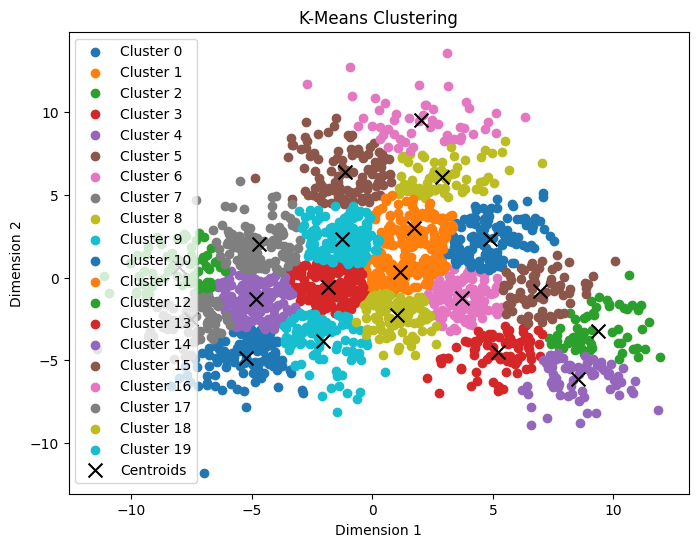

In [175]:
plot(embeddings)

# Kmeans on the whole data

In [180]:
# perform clustering
pred_em,centroids_em = clust(embeddings, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred_em,labels)
ari_score = adjusted_rand_score(pred_em,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.41 
ARI: 0.23


In [193]:
 def cross_validation(red_emb,N):
  nmi = []
  ari = []
  for i in range(N):

    pred,centroids = clust(red_emb, 20)
    nmi_score = normalized_mutual_info_score(pred,labels)
    ari_score = adjusted_rand_score(pred,labels)
    nmi.append(nmi_score)
    ari.append(ari_score)

  print(f"NMI scores : {nmi}")
  print(f"ARI scores : {ari}")
  print(f"the mean of NMI is {np.mean(nmi)}")
  print(f"the mean of ARI is {np.mean(ari)}")




In [194]:
cross_validation(red_emb,5)

NMI scores : [0.41575610507834593, 0.4092340162498309, 0.40325179072353806, 0.4228187274979394, 0.4122618170867397]
ARI scores : [0.22682539915983155, 0.21701320780498592, 0.22332149488744424, 0.24231201433595023, 0.2431785470517505]
the mean of NMI is 0.4126644913272788
the mean of ARI is 0.2305301326479925
